<a href="https://colab.research.google.com/github/junwin/colab/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up a regression model for house prices using Keras and Tensorflow
Using Tensorflow, Keras and Python in Jupyter Notebooks is a popular way to develop machine learning applications.

To understand how the functionality fits in the machine learning workflow ( data preparation, training the model and evaluating the fit using test data sets) I decided to apply the tools to estimate the sale prices of houses.

The approach is similar to the sample I produced using ML.Net from Microsoft: https://towardsdatascience.com/predicting-a-house-price-using-ml-net-6555ff3caeb

We will run the code in Google's Colaboratory since this provides an excellent environment that allows access to GPU's, requires no configuration and enables sharing.

We need to sanity test the raw data we loaded to ensure the columns are in the date range we expect.  It is a good idea to check the data for any outliers; for example, in my first iteration, one home had 82 garage spots.

Be aware that there is a regional bias in the data since all the test data came from a few areas of Chicago's northern suburbs.


## Dependencies
First, let's load any dependencies required.

In [1]:
#@title Dependancies
import pandas as pd

# TensorFlow is an open source machine learning library
import tensorflow as tf

# Keras is TensorFlow's high-level API for deep learning
from tensorflow import keras
from tensorflow.keras import regularizers
# Numpy is a math library
import numpy as np
# Pandas is a data manipulation library 
import pandas as pd
# Matplotlib is a graphing library
import matplotlib.pyplot as plt
# Math is Python's math library
import math
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler

## Let's load a dataset of house sales. 
We need to sanity test the raw data we loaded to ensure the columns are in the date range we expect. It is a good idea to check the data for any outliers; for example, in my first iteration, one home had 82 garage spots. Be aware that there is a regional bias in the data since all the test data came from a few areas of Chicago's northern suburbs.


In [3]:
url="https://junwin.github.io/data/cleanData.csv"
housePrices=pd.read_csv(url).sample(frac=1)
# We will not process the ClosedDate column - so remove it
#housePrices.pop('YearClosed')
#housePrices.pop('MLS #')
#housePrices.pop('YearBuilt')
#housePrices.pop('Stat')
prices = housePrices.pop('SoldPr') / 1000000
housePrices['Area'] = housePrices['Area']/1000
housePrices.head()
#housePrices.dtypes

,SFH,Condo,Duplex,Townhouse,New,Recent,20A,19A,19B,19C,19D,Pre1900,Area,Rooms,FullBaths,HalfBaths,BsmtBth,Beds,BsmtBeds,GarageSpaces,60002,60025,60026,60029,60035,60053,60062,60067,60076,60077,60091,60201,60202,60203,60625,60626,60638,63104
5888,1,0,0,0,0,0,1,0,0,0,0,0,4.136,11,3,0,0,4.0,0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2107,1,0,0,0,0,0,0,1,0,0,0,0,2.008,9,2,0,0,4.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8354,1,0,0,0,0,0,0,0,1,0,0,0,1.100,7,2,0,1,3.0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1654,0,1,0,0,0,0,0,1,0,0,0,0,1.350,5,2,0,0,2.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5547,1,0,0,0,0,0,0,1,0,0,0,0,3.412,9,2,1,0,4.0,0,3.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## Features
Let's grab the features we want to model; the good thing is that its relatively easy to experiment with different features using pandas.

In [5]:

SAMPLES = len(housePrices.index)
featureCount = len(housePrices.columns)
#selectedFeatures.describe()


### Understanding the input data
It is imperative to have a good overview of the model's data, so you need to plot some of the features to check any issues. Suppose you look at the first plot of the area against price:
* there are many issues as the area increases. 
* most of the data is for smaller homes.

I am not going to address these issues here, but the input merits some scrutiny.


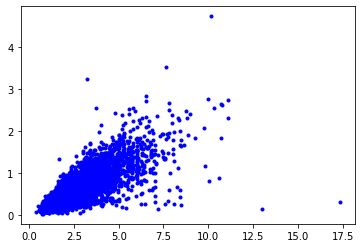

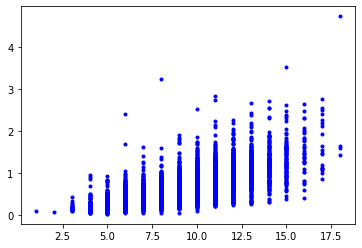

In [6]:
# Plot our data to examine the relationship between some features and price
plt.plot(housePrices['Area'], prices, 'b.')
plt.show()
plt.plot(housePrices['Rooms'], prices, 'b.')
plt.show()


## Separate data
We need to split our data into three parts, the first 60% is for training, 20% are set aside for validation and the last 20% for a final test.

In [7]:
TRAIN_SPLIT =  int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

training_examples = housePrices.head(TRAIN_SPLIT)
training_targets = prices.head(TRAIN_SPLIT)

validation_examples = housePrices[TRAIN_SPLIT:-1]
validation_targets = prices[TRAIN_SPLIT:-1]

#test_examples = selectedFeaturesScale.tail(int(0.2 * SAMPLES))
#test_targets = pricesScale.tail(int(0.2 * SAMPLES))

# Double-check that we've done the right thing.
print("Training examples summary:")
training_examples.describe()
print("Validation examples summary:")
validation_examples.describe()

print("Training targets summary:")
training_targets.describe()
print("Validation targets summary:")
validation_targets.describe()


Training examples summary:
Validation examples summary:
Training targets summary:
Validation targets summary:


count    3743.000000
mean        0.485779
std         0.335648
min         0.026791
25%         0.275264
50%         0.383373
75%         0.603328
max         3.247200
Name: SoldPr, dtype: float64

In [8]:
dataset = tf.data.Dataset.from_tensor_slices((training_examples.values, training_targets .values))
train_dataset = dataset.shuffle(len(training_examples)).batch(20)

dataset2 = tf.data.Dataset.from_tensor_slices((validation_examples.values, validation_targets .values))
validation_dataset = dataset.shuffle(len(validation_examples)).batch(1)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
  

  
model.fit(train_dataset, epochs=15)




Epoch 1/15
281/281 [==============================] - 1s 2ms/step - loss: 0.1248 - mae: 0.2226
Epoch 2/15
281/281 [==============================] - 0s 2ms/step - loss: 0.0376 - mae: 0.1216
Epoch 3/15
281/281 [==============================] - 0s 2ms/step - loss: 0.0284 - mae: 0.1108
Epoch 4/15
281/281 [==============================] - 0s 2ms/step - loss: 0.0241 - mae: 0.1019
Epoch 5/15
281/281 [==============================] - 0s 2ms/step - loss: 0.0237 - mae: 0.0994
Epoch 6/15
281/281 [==============================] - 0s 2ms/step - loss: 0.0218 - mae: 0.0952
Epoch 7/15
281/281 [==============================] - 0s 1ms/step - loss: 0.0225 - mae: 0.0937
Epoch 8/15
281/281 [==============================] - 0s 2ms/step - loss: 0.0235 - mae: 0.0930
Epoch 9/15
281/281 [==============================] - 0s 2ms/step - loss: 0.0214 - mae: 0.0913
Epoch 10/15
281/281 [==============================] - 0s 2ms/step - loss: 0.0222 - mae: 0.0922
Epoch 11/15
281/281 [============================

In [9]:
training_examples
#tf.convert_to_tensor(training_examples)

,SFH,Condo,Duplex,Townhouse,New,Recent,20A,19A,19B,19C,19D,Pre1900,Area,Rooms,FullBaths,HalfBaths,BsmtBth,Beds,BsmtBeds,GarageSpaces,60002,60025,60026,60029,60035,60053,60062,60067,60076,60077,60091,60201,60202,60203,60625,60626,60638,63104
5888,1,0,0,0,0,0,1,0,0,0,0,0,4.136,11,3,0,0,4.0,0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2107,1,0,0,0,0,0,0,1,0,0,0,0,2.008,9,2,0,0,4.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8354,1,0,0,0,0,0,0,0,1,0,0,0,1.100,7,2,0,1,3.0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1654,0,1,0,0,0,0,0,1,0,0,0,0,1.350,5,2,0,0,2.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5547,1,0,0,0,0,0,0,1,0,0,0,0,3.412,9,2,1,0,4.0,0,3.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3890,1,0,0,0,1,0,0,0,0,0,0,0,1.601,5,2,0,0,3.0,0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3071,0,1,0,0,0,0,1,0,0,0,0,0,1.425,6,2,0,0,2.0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2987,0,1,0,0,0,0,1,0,0,0,0,0,1.054,6,2,0,0,2.0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4431,0,0,0,1,0,0,0,1,0,0,0,0,1.320,5,1,1,0,2.0,0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Training a model using Keras
Now we have our data we can use Keras (a high-level API to Tensorflow) to create a model.
 Keras makes it easy to experiment with different model architectures and visualize the results.

We will begin with three layers and use the "relu" activation function. Notice that the first layer uses the featureCount to define its input shape, and the final layer outputs to a single neuron since its the predicted price.

If you think the model is overfitting you can easily add regularization to manage the problem - these are commented out below.


In [10]:
model_1 = tf.keras.Sequential()

model_1.add(keras.layers.Dense(42, activation='relu'))
#model_1.add(keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(featureCount,)))
model_1.add(keras.layers.Dense(16, activation='relu'))
#model_1.add(keras.layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_1.add(keras.layers.Dense(4, activation='relu'))
#model_1.add(keras.layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model_1.add(keras.layers.Dense(1))

# Compile the model using the standard 'adam' optimizer and the mean squared error or 'mse' loss function for regression.
model_1.compile(optimizer='adam', loss='mse', metrics=['mae'])

#model_1.summary()

### Having created the model, we will now train it.

In [11]:
# Train the model on our training data while validating on our validation set
history_1 = model_1.fit(train_dataset,  epochs=25, batch_size=50,
                        validation_data=(validation_dataset))

Epoch 1/25
281/281 [==============================] - 5s 15ms/step - loss: 0.0419 - mae: 0.1333 - val_loss: 0.0232 - val_mae: 0.0972
Epoch 2/25
281/281 [==============================] - 4s 15ms/step - loss: 0.0237 - mae: 0.0964 - val_loss: 0.0252 - val_mae: 0.1055
Epoch 3/25
281/281 [==============================] - 4s 15ms/step - loss: 0.0259 - mae: 0.0989 - val_loss: 0.0202 - val_mae: 0.0846
Epoch 4/25
281/281 [==============================] - 4s 15ms/step - loss: 0.0207 - mae: 0.0879 - val_loss: 0.0197 - val_mae: 0.0863
Epoch 5/25
281/281 [==============================] - 4s 15ms/step - loss: 0.0184 - mae: 0.0846 - val_loss: 0.0201 - val_mae: 0.0895
Epoch 6/25
281/281 [==============================] - 4s 15ms/step - loss: 0.0196 - mae: 0.0875 - val_loss: 0.0193 - val_mae: 0.0856
Epoch 7/25
281/281 [==============================] - 4s 15ms/step - loss: 0.0199 - mae: 0.0853 - val_loss: 0.0223 - val_mae: 0.0998
Epoch 8/25
281/281 [==============================] - 4s 15ms/step - 

### Understanding the results
Having trained our model, we now need to check the training metrics to see how the model converges. First, we will check out training over all the epochs, then show a graph that excludes some of the initial epochs to focus on whats happening nearer the end.

We can see a very rapid convergence, where the loss flattens out after about 50 epochs. On the second plot, it looks like a reasonable difference between the training and validation loss.


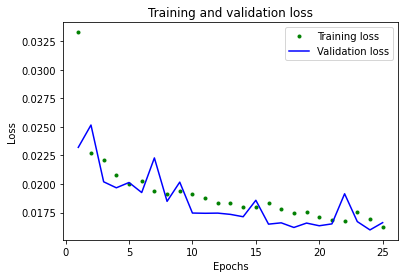

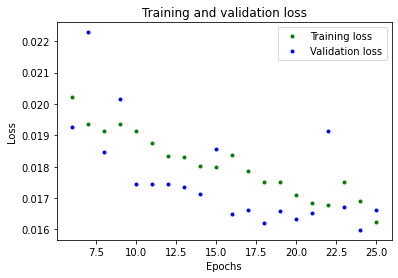

In [12]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
train_loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Exclude the first few epochs so the graph is easier to read
SKIP = 5

plt.plot(epochs[SKIP:], train_loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Final test
We can now use the 20% of the data we kept aside for a final test. First, we use the model to evaluate the test data and print out the mean squared error and the mean average error for predictions. The overall loss on the test data correlates well with the results seen in the validation set.

It's a great idea to visualize some of the data by plotting actuals against predicted results.

In [ ]:
# Calculate and print the loss on our test dataset
test_loss, test_mae = model_1.evaluate(test_examples, test_targets)
print("mean squared error:", test_loss, " mean average error:", test_mae)

#y_test_pred = model_1.predict(test_examples)

# Graph the predictions against the actual values
#plt.clf()
#plt.title('Comparison of predictions and actual values')
#plt.plot( test_targets,  y_test_pred, 'b.', label='Actual values')
#plt.show()


61/61 [==============================] - 0s 939us/step - loss: 0.0012 - mae: 0.0213
mean squared error: 0.0012115772115066648  mean average error: 0.02132599614560604


## Plot a comparison of actual and predicted for a single zip
The comparison shows promising results for this particular training run.

In [ ]:
y_test_pred = model_1.predict(test_examples)

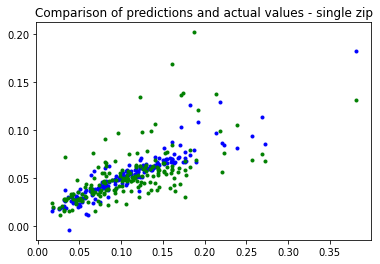

In [ ]:
sampleInfo = pd.DataFrame();
samplePx = pd.DataFrame();

i=0
while i < test_examples.values.shape[0]:
  myRow =  test_examples.iloc[[i]]
  myPxRow = test_targets.iloc[[i]]

  if round(myRow['Zip'].values[0],2) == 0:
    sampleInfo = sampleInfo.append(myRow)
    samplePx = samplePx.append(myPxRow)
    
  i = i + 1

y_test_pred = model_1.predict(sampleInfo)

plt.clf()
plt.title('Comparison of predictions and actual values - single zip')
plt.plot( sampleInfo['Area'], y_test_pred, 'b.', label='predicted values')
plt.plot( sampleInfo['Area'], samplePx, 'g.', label='Actual values')
#plt.plot( samplePx,  y_test_pred, 'b.', label='Actual values')
plt.show()

## Run your examples
Let's try with a couple of test inferences  - the single-family home (SFH) should be lower in zip 60002 than 60076

In [ ]:

housePrices





houseData = {'YearClosed': [2020.00, 2019.00, 2019.00, 2019.00, 2019],
	'Type': ['SFH', 'SFH', 'SFH', 'Condo', 'Townhouse'],
	'Area': [2940, 1500, 1500, 1500, 1500],
  'Zip': [60002, 60002, 60076, 60076, 60076],
	'Rooms': [9, 7, 7, 7, 7],
  'FullBaths': [2.5, 2.5, 2.5, 2.5, 2.5],
  'Beds': [4, 3, 3, 3, 3],
  'GarageSpaces': [2, 2, 2, 0, 0]  }

houseInfo = pd.DataFrame(houseData)
ordinalData = houseInfo[ordinalColumns]
houseInfo[ordinalColumns] = enc.transform(ordinalData)


houseInfo =  pd.DataFrame(featureScaler.transform(houseInfo), columns=houseInfo.columns)
newPrices = priceScaler.inverse_transform(model_1.predict(houseInfo))
print(newPrices)





[[314568.53]
 [219923.77]
 [347135.53]
 [199014.89]
 [257478.86]]


## Saving a model for later use
Now that we have a working model, we will save it.
We will then use the model without further training.


In [ ]:
keras.models.save_model(model_1, 'housePriceModel2.hp5', True)
! zip -r hpmodel.zip housePriceModel *.pkl

! pip install tensorflowjs
import tensorflowjs as tfjs

tfjs.converters.save_keras_model(model_1, 'tensorFlowJs')

INFO:tensorflow:Assets written to: housePriceModel2.hp5/assets
	zip warning: name not matched: *.pkl
updating: housePriceModel/ (stored 0%)
updating: housePriceModel/assets/ (stored 0%)
updating: housePriceModel/saved_model.pb (deflated 87%)
updating: housePriceModel/variables/ (stored 0%)
updating: housePriceModel/variables/variables.data-00000-of-00001 (deflated 47%)
updating: housePriceModel/variables/variables.index (deflated 63%)
     |████████████████████████████████| 71kB 5.2MB/s 
     |████████████████████████████████| 112kB 11.6MB/s 
  Found existing installation: tensorflow-hub 0.11.0
    Uninstalling tensorflow-hub-0.11.0:
      Successfully uninstalled tensorflow-hub-0.11.0


/usr/local/lib/python3.7/dist-packages/tensorflowjs/converters/keras_h5_conversion.py:123: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)


# Loading a model
Let's load the scalers, encoders and model and predict prices using the model we loaded; the indicated prices should be the same as above.

In [ ]:
#! unzip  /content/hpmodel.zip

featureScaler2 = joblib.load('/content/my_cool_scaler.pkl')
priceScaler2 = joblib.load('/content/my_cool_pxscaler.pkl')
enc2 = joblib.load('/content/my_cool_encoder.pkl')  
ordinalColumns = ['YearClosed', 'Type', 'Zip']
model_2 = keras.models.load_model("housePriceModel")


In [ ]:
prices.head

<bound method NDFrame.head of 1166    0.645750
1446    0.994250
530     0.392575
629     0.460738
1561    1.383750
          ...   
921     0.430500
2618    1.549672
1576    1.440125
1559    1.383750
2366    0.716475
Name: SoldPr, Length: 2682, dtype: float64>

In [14]:
zzz  = training_examples.values[0]
print(zzz)
zzz = zzz.reshape(1,38)
model_1.predict(zzz)

[ 1.     0.     0.     0.     0.     0.     1.     0.     0.     0.
  0.     0.     4.136 11.     3.     0.     0.     4.     0.     2.
  1.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.   ]


array([[0.43641]], dtype=float32)

In [ ]:


houseData2 = {'YearClosed': [2020.00, 2019.00, 2019.00, 2019.00, 2019],
	'Type': ['SFH', 'SFH', 'SFH', 'Condo', 'Townhouse'],
	'Area': [2940, 1500, 1500, 1500, 1500],
  'Zip': [60002, 60002, 60076, 60076, 60076],
	'Rooms': [9, 7, 7, 7, 7],
  'FullBaths': [2.5, 2.5, 2.5, 2.5, 2.5],
  'Beds': [4, 3, 3, 3, 3],
  'GarageSpaces': [2, 2, 2, 0, 0]  }

houseInfo2 = pd.DataFrame(houseData2)
ordinalData2 = houseInfo2[ordinalColumns]
houseInfo2[ordinalColumns] = enc2.transform(ordinalData)

houseInfo2 =  pd.DataFrame(featureScaler2.transform(houseInfo2), columns=houseInfo2.columns)
newPrices2 = priceScaler2.inverse_transform(model_2.predict(houseInfo2))
print(newPrices)
houseInfo2.to_json(r'houseInfo.json')

[[314568.53]
 [219923.77]
 [347135.53]
 [199014.89]
 [257478.86]]


# Using your model in different environments
A good thing about using Tensorflow and Keras is that it is relatively easy to convert your trained model to work in a different environment.The script below shows how to generate a model for JavaScript.

In [ ]:
! pip install tensorflowjs
import tensorflowjs as tfjs

tfjs.converters.save_keras_model(model_1, 'tensorFlowJs')
! zip -r hpmodelJs.zip tensorFlowJs


# Optional fun

If we are happy with the model we can now convert and save it - I choose to save the model using Tensorflow lite to be able to run it on a small device.


In [ ]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_1)
model_no_quant_tflite = converter.convert()

# Save the model to disk
open("housePriceModelNoQuantization", "wb").write(model_no_quant_tflite)


If you want to run the model using C on some smaller device (e.g. a Raspberry Pi) you can dump the model weightd as a C++ file.


In [ ]:
# Install xxd if it is not available
!apt-get update && apt-get -qq install xxd
# Convert to a C source file, i.e, a TensorFlow Lite for Microcontrollers model
!xxd -i housePriceModelNoQuantization > model_1.cc
!cat model_1.cc
# Update variable names
#REPLACE_TEXT = MODEL_TFLITE.replace('/', '_').replace('.', '_')
#!sed -i 's/'{REPLACE_TEXT}'/g_model/g' {MODEL_TFLITE_MICRO}